The last puzzle: EPA data. EPA combines the water level (depth between water and surface) and water quality together already. Be aware, the water depth is different to the water elevation from WRA data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Clean data

In [2]:
epa_df = pd.read_excel(
    'data/環保署濁水溪屏東_地下水水質1993-2020.xlsx',
    sheet_name='1993_2020(濁水溪)'
    )
epa_df.head()

,測站名稱,Sampling date,Sampling time,ID,水面至井口深度,T,EC,pH,DO (Electrode Method),dissolved oxygen saturation,...,"1,2-DCE (RE)",\tTCE,\tPCE,Chloroethene,Dichloromethane,"\t1,1,2-TCE","1,1,1-trichloroethane","1,2-Dichlorobenzene",\tMTBE,remark
0,NaN,NaN,NaN,NaN,m,℃,μmho/cm25℃,NaN,mg/L,%,...,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,NaN
1,二林營運所,1993/04/16,00:00:00,4035.0,--,21,490,7.3,--,--,...,--,--,--,--,--,--,--,--,--,無
2,二林營運所,1993/08/18,00:00:00,4035.0,--,28,434,7.7,--,--,...,--,--,--,--,--,--,--,--,--,無
3,二林營運所,1993/12/29,00:00:00,4035.0,--,24,503,7.5,--,--,...,--,--,--,--,--,--,--,--,--,無
4,二林營運所,1994/04/25,00:00:00,4035.0,--,26,435,7,--,--,...,--,--,--,--,--,--,--,--,--,無


In [3]:
epa_df = epa_df[1:]
epa_df.head()

,測站名稱,Sampling date,Sampling time,ID,水面至井口深度,T,EC,pH,DO (Electrode Method),dissolved oxygen saturation,...,"1,2-DCE (RE)",\tTCE,\tPCE,Chloroethene,Dichloromethane,"\t1,1,2-TCE","1,1,1-trichloroethane","1,2-Dichlorobenzene",\tMTBE,remark
1,二林營運所,1993/04/16,00:00:00,4035.0,--,21,490,7.3,--,--,...,--,--,--,--,--,--,--,--,--,無
2,二林營運所,1993/08/18,00:00:00,4035.0,--,28,434,7.7,--,--,...,--,--,--,--,--,--,--,--,--,無
3,二林營運所,1993/12/29,00:00:00,4035.0,--,24,503,7.5,--,--,...,--,--,--,--,--,--,--,--,--,無
4,二林營運所,1994/04/25,00:00:00,4035.0,--,26,435,7,--,--,...,--,--,--,--,--,--,--,--,--,無
5,二林營運所,1994/08/09,00:00:00,4035.0,--,26,490,7.5,--,--,...,--,--,--,--,--,--,--,--,--,無


In [4]:
epa_df.shape

(2744, 58)

## Modify the column names 
to avoid errors later exporting shape files.

In [5]:
epa_df.columns

Index(['測站名稱', 'Sampling date', 'Sampling time', 'ID', '水面至井口深度', 'T', 'EC',
       'pH', 'DO (Electrode Method)', 'dissolved oxygen saturation',
       'total hardness', 'TDS', 'Cl', 'NH3', 'NO2', 'SO4', 'TOC', 'As', 'Cd',
       'Cr', 'Cu', 'Pb', 'Zn', 'Fe', 'Mn', 'Hg', 'Ni', 'total phenol', 'F',
       'Na', 'K', 'Ca', 'Mg', 'Alkalinity', 'benzene', 'toluene',
       'ethylbenzene', 'xylene', 'naphthalene', 'CCl4', 'chlorobenzene',
       'chloroform', 'methyl chloride', 'p-dicholorobenzene',
       '1,1-Dichloroethane', '1,2-dichloroethane', '1,1-Dichloroethylene',
       '1,2-DCE', '1,2-DCE (RE)', '\tTCE', '\tPCE', 'Chloroethene',
       'Dichloromethane', '\t1,1,2-TCE', '1,1,1-trichloroethane',
       '1,2-Dichlorobenzene', '\tMTBE', 'remark'],
      dtype='object')

In [6]:
epa_df.columns = ['SiteName', 'Date', 'Time', 'SiteId', 'WaterDe_m', 'Temp', 'EC',
       'pH', 'DO', 'DOS',
       'Hardness', 'TDS', 'Cl', 'NH3', 'NO2', 'SO4', 'TOC', 'As', 'Cd',
       'Cr', 'Cu', 'Pb', 'Zn', 'Fe', 'Mn', 'Hg', 'Ni', 'Phenol', 'F',
       'Na', 'K', 'Ca', 'Mg', 'Alkalinity', 'Benzene', 'Toluene',
       'ethyl-b', 'Xylene', 'Naphthalen', 'CCl4', 'Cl-b',
       'Chloroform', 'Methyl-Cl', 'p-d.c.b',
       '11-d.c.t', '12-d.c.t', '11-d.c.y',
       '12-DCE', '12-DCE(RE)', 'TCE', 'PCE', 'Cl-ethene',
       'DCE', '112-TCE', '111-TCE',
       '12-DCB', 'MTBE', 'remark']

In [7]:
pd.to_datetime(epa_df.Date + ' ' + epa_df.Time)

1      1993-04-16 00:00:00
2      1993-08-18 00:00:00
3      1993-12-29 00:00:00
4      1994-04-25 00:00:00
5      1994-08-09 00:00:00
               ...        
2740   2020-01-13 09:29:00
2741   2020-04-23 14:14:00
2742   2020-05-13 11:47:00
2743   2020-07-10 10:12:00
2744   2020-10-29 13:45:00
Length: 2744, dtype: datetime64[ns]

In [8]:
epa_df['Datetime'] = pd.to_datetime(epa_df.Date + ' ' + epa_df.Time)
epa_df = epa_df.drop(['Date', 'Time', 'remark'], axis=1)
epa_df.head()

,SiteName,SiteId,WaterDe_m,Temp,EC,pH,DO,DOS,Hardness,TDS,...,12-DCE(RE),TCE,PCE,Cl-ethene,DCE,112-TCE,111-TCE,12-DCB,MTBE,Datetime
1,二林營運所,4035.0,--,21,490,7.3,--,--,312,--,...,--,--,--,--,--,--,--,--,--,1993-04-16
2,二林營運所,4035.0,--,28,434,7.7,--,--,288,--,...,--,--,--,--,--,--,--,--,--,1993-08-18
3,二林營運所,4035.0,--,24,503,7.5,--,--,296,--,...,--,--,--,--,--,--,--,--,--,1993-12-29
4,二林營運所,4035.0,--,26,435,7,--,--,254,--,...,--,--,--,--,--,--,--,--,--,1994-04-25
5,二林營運所,4035.0,--,26,490,7.5,--,--,660,--,...,--,--,--,--,--,--,--,--,--,1994-08-09


## Check duplicates

In [10]:
epa_df['ID'] = ['{}_{}'.format(id, time) for id, time in zip(epa_df.SiteId, epa_df.Datetime)]
epa_df['ID'].duplicated().sum()

0

In [15]:
epa_df = epa_df.drop('ID', axis=1)

## Assign MDL values
The measurements are recored as <XXXX (XXXX is the MDL value) when its out of the MDL. I write a function implemented with apply() to transform them to half of the MDL values.

In [16]:
for test in ['<0.001', '--']:
    print(type(test) == str and len(test) > 2)

True
False


In [17]:
def mdl(x):
    if (type(x) == str) and (len(x) > 2):
        # use the half of the MDL to replace it
        return float(x[1:])/2
    else:
        return x

In [18]:
mdl(epa_df.iloc[2740, -2])

0.001

In [19]:
# start from DO because before are the parameters having no MDL issue
epa_df.iloc[:, 6:].applymap(mdl)

,DO,DOS,Hardness,TDS,Cl,NH3,NO2,SO4,TOC,As,...,12-DCE(RE),TCE,PCE,Cl-ethene,DCE,112-TCE,111-TCE,12-DCB,MTBE,Datetime
1,--,--,6.0,--,3,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,1993-04-16 00:00:00
2,--,--,44.0,--,4,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,1993-08-18 00:00:00
3,--,--,48.0,--,4,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,1993-12-29 00:00:00
4,--,--,27.0,--,3,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,1994-04-25 00:00:00
5,--,--,30.0,--,6,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,1994-08-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,0.1,--,49.0,20.0,195.0,0.105,0.015,26.0,0.425,0.0102,...,--,--,--,--,--,--,--,--,--,2020-01-13 09:29:00
2741,--,--,--,--,--,--,--,--,--,--,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,2020-04-23 14:14:00
2742,0.45,--,30.0,180.0,440.0,0.05,0.005,41.0,0.005,0.0044,...,--,--,--,--,--,--,--,--,--,2020-05-13 11:47:00
2743,0.0,--,4.0,195.0,310.0,0.44,0.005,44.0,0.265,0.0035,...,--,--,--,--,--,--,--,--,--,2020-07-10 10:12:00


In [20]:
epa_mo = pd.concat(
    [epa_df.iloc[:, :6], epa_df.iloc[:, 6:].applymap(mdl)], 
    axis=1, join='inner'
    )
print(epa_df.iloc[:5, 14:18])
print(epa_mo.iloc[:5, 14:18])

  TOC  As     Cd     Cr
1  --  --     --     --
2  --  --  <0.01  <0.01
3  --  --  <0.01  <0.05
4  --  --  <0.01  <0.05
5  --  --  <0.01  <0.05
  TOC  As     Cd     Cr
1  --  --     --     --
2  --  --  0.005  0.005
3  --  --  0.005  0.025
4  --  --  0.005  0.025
5  --  --  0.005  0.025


## Change the rest strings to NAs
They should all be -- indicating no measurement. Meanwhile, downcast the values to save storage.

In [21]:
# excluding SiteName and Datetime
# SiteId is include because they are all in int in EPA data
epa_mo.iloc[:, 1:-1].apply(pd.to_numeric, downcast= 'integer', errors='coerce').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 1 to 2744
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SiteId      2744 non-null   int16  
 1   WaterDe_m   1672 non-null   float64
 2   Temp        2391 non-null   float64
 3   EC          2394 non-null   float64
 4   pH          2394 non-null   float64
 5   DO          493 non-null    float64
 6   DOS         0 non-null      float64
 7   Hardness    2212 non-null   float64
 8   TDS         2192 non-null   float64
 9   Cl          2354 non-null   float64
 10  NH3         2278 non-null   float64
 11  NO2         2278 non-null   float64
 12  SO4         2264 non-null   float64
 13  TOC         2231 non-null   float64
 14  As          2105 non-null   float64
 15  Cd          2350 non-null   float64
 16  Cr          2316 non-null   float64
 17  Cu          2317 non-null   float64
 18  Pb          2228 non-null   float64
 19  Zn          2306 non-null  

In [22]:
epa_mo2 = pd.concat(
    [epa_mo[['SiteName', 'Datetime']], 
     epa_mo.iloc[:, 1:-1].apply(pd.to_numeric, downcast= 'integer', errors='coerce')],
     axis=1, join='outer'
    )
epa_mo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 1 to 2744
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SiteName    2744 non-null   object        
 1   Datetime    2744 non-null   datetime64[ns]
 2   SiteId      2744 non-null   int16         
 3   WaterDe_m   1672 non-null   float64       
 4   Temp        2391 non-null   float64       
 5   EC          2394 non-null   float64       
 6   pH          2394 non-null   float64       
 7   DO          493 non-null    float64       
 8   DOS         0 non-null      float64       
 9   Hardness    2212 non-null   float64       
 10  TDS         2192 non-null   float64       
 11  Cl          2354 non-null   float64       
 12  NH3         2278 non-null   float64       
 13  NO2         2278 non-null   float64       
 14  SO4         2264 non-null   float64       
 15  TOC         2231 non-null   float64       
 16  As          2105 non-nul

Nice, no dupicates!

## Check if there are extreme values

In [23]:
for col in epa_mo2.columns[3:]:
    if any((epa_mo2[col] < -9990) | (epa_mo2[col] > 99990)):
        print(col)

EC


<AxesSubplot:ylabel='Frequency'>

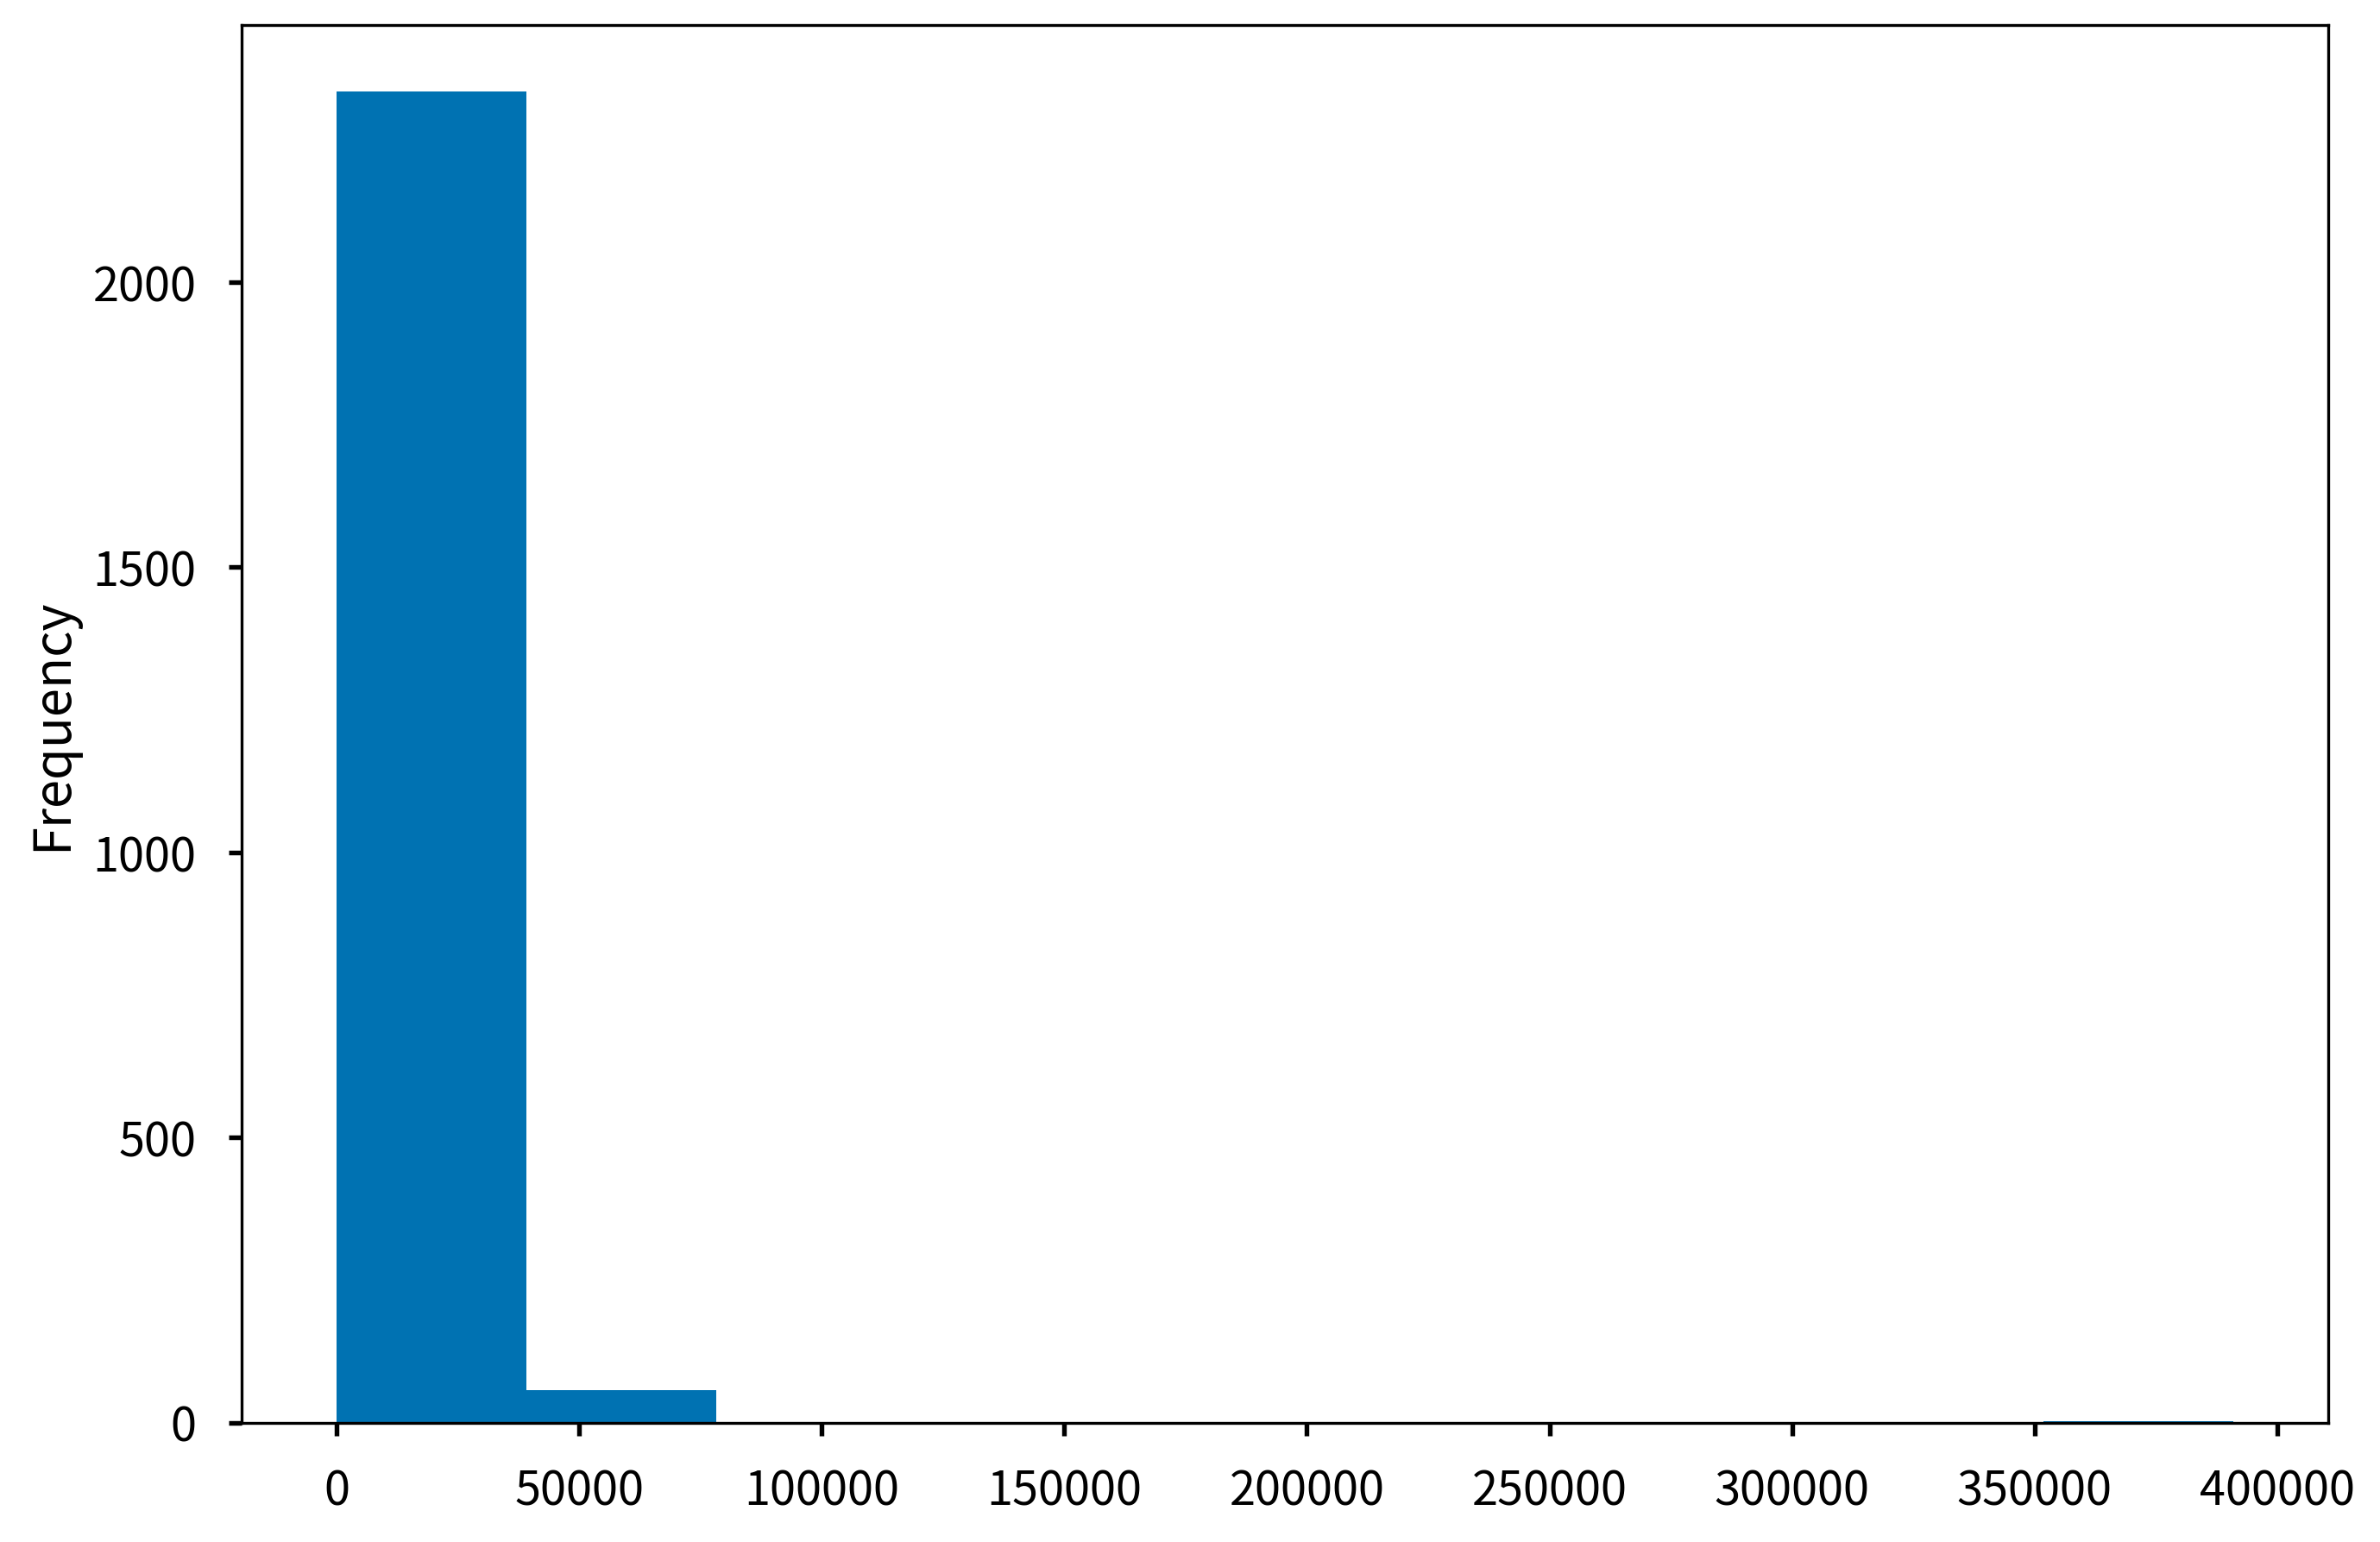

In [24]:
epa_mo2['EC'].plot(kind='hist')

In [25]:
epa_mo2.loc[epa_mo2['EC']>99990, 'EC']

704    316000.0
705    391000.0
706    385000.0
707    384000.0
Name: EC, dtype: float64

It looks okay. Not 999XXX something so I would let it pass.

In [26]:
epa_mo2.loc[epa_mo2['WaterDe_m']<0, 'WaterDe_m']

Series([], Name: WaterDe_m, dtype: float64)

No negative water depth.

# Assign GPS
I son't have the well surface elevation in EPA data so I can't use it as measure to filter out bad data.

In [27]:
excel_df = pd.read_excel('data/環保署水利署地下水井.xlsx')
#excel_df = excel_df[~excel_df.TWD97Lon.isna()]
excel_df.head()

,SiteId,SiteName,SiteEngName,County,Township,UgwDistName,TWD97Lon,TWD97Lat,TWD97TM2X,TWD97TM2Y,SiteAddress,StatusOfUse,數據紀錄始,數據紀錄終,資料數,data
0,4035,二林營運所,Erling Operation Center,彰化縣,二林鎮,濁水溪沖積扇,NaN,NaN,NaN,NaN,彰化縣二林鎮儒林路二段100號,廢站,1993/04,1999/05,18.0,環保署
1,4413,二崙國小,ErLun Elementary School,雲林縣,二崙鄉,濁水溪沖積扇,120.415102,23.771842,190386.40,2629878.33,雲林縣二崙鄉崙東村中興路36號,啟用,1999/08,2020/10,81.0,環保署
2,4133,二崙國小,ErLun Elementary School,雲林縣,二崙鄉,濁水溪沖積扇,NaN,NaN,NaN,NaN,雲林縣二崙鄉崙東村中興路36號,廢站,NaN,NaN,NaN,環保署
3,4403,口湖國小青蚶分校,"Kaohu Elementary School, Chingan Subdivision",雲林縣,口湖鄉,濁水溪沖積扇,120.161008,23.597331,164374.03,2610680.84,雲林縣口湖鄉青蚶村93號,啟用,1999/12,2020/10,84.0,環保署
4,4139,口湖國小青蚶分校,"Kaohu Elementary School, Chingan Subdivision",雲林縣,口湖鄉,濁水溪沖積扇,NaN,NaN,NaN,NaN,雲林縣口湖鄉青蚶村93號,廢站,NaN,NaN,NaN,環保署


In [28]:
np.isnan(excel_df.iloc[0, -7])

True

If the GPS is NA, it means the site is abandoned and the measurements are usally quite few. I would simply ignore them.

In [30]:
compile_df = pd.DataFrame()
for well_id in epa_mo2.SiteId.unique():
    X = epa_mo2[epa_mo2.SiteId == well_id].copy()
    ex1_mask = excel_df.SiteId.astype(str) == str(well_id)
    if np.isnan(excel_df.loc[ex1_mask, 'TWD97Lon'].values[0]):
        print(well_id)
    else:
        X['SiteName'] = np.repeat(excel_df.loc[ex1_mask, 'SiteName'].values, len(X))
        X['Lon'] = np.repeat(excel_df.loc[ex1_mask, 'TWD97Lon'].values, len(X))
        X['Lat'] = np.repeat(excel_df.loc[ex1_mask, 'TWD97Lat'].values, len(X))
        compile_df = pd.concat([compile_df, X], axis=0, join='outer')

4035
4133
4139
4138
4136
4034
4134
4038
4130
4129
4137
4036
4141
4140
4132
4037
4033
4131
4135
4032


In [31]:
compile_df

,SiteName,Datetime,SiteId,WaterDe_m,Temp,EC,pH,DO,DOS,Hardness,...,TCE,PCE,Cl-ethene,DCE,112-TCE,111-TCE,12-DCB,MTBE,Lon,Lat
20,二崙國小,2000-03-22 00:00:00,4413,NaN,23.5,1130.0,7.00,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
21,二崙國小,2000-06-21 00:00:00,4413,NaN,27.0,1060.0,7.30,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
22,二崙國小,2000-08-17 00:00:00,4413,NaN,25.0,1080.0,7.00,NaN,NaN,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
23,二崙國小,2000-12-20 00:00:00,4413,NaN,25.8,1040.0,7.30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
28,二崙國小,2002-03-14 11:51:00,4413,NaN,27.6,1060.0,7.00,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,豐安國小,2020-01-13 09:29:00,4206,1.769,26.5,6410.0,7.09,0.10,NaN,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.234671,23.789829
2741,豐安國小,2020-04-23 14:14:00,4206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,120.234671,23.789829
2742,豐安國小,2020-05-13 11:47:00,4206,2.090,27.2,6440.0,7.48,0.45,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.234671,23.789829
2743,豐安國小,2020-07-10 10:12:00,4206,1.783,27.3,5320.0,7.10,0.00,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.234671,23.789829


In [32]:
len(compile_df) / len(epa_mo2)

0.9471574344023324

Around 5% of data lost due to the lack of GPS.

# Output cleaned results

In [33]:
compile_df.to_csv('data/database_ZAF_wl+wa_epa_clean_gps_{}.csv'.format(date), index=False)
compile_df.iloc[:, :-2].to_csv('data/database_ZAF_wl+wa_epa_clean_{}.csv'.format(date), index=False)
print(date)

20211008


# Play Geopandas

In [34]:
import geopandas as gd
gdf = gd.GeoDataFrame(
    compile_df, 
    geometry=gd.points_from_xy(compile_df.Lon, compile_df.Lat), 
    crs='EPSG:4326'
    )

In [35]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
gdf.head()

,SiteName,Datetime,SiteId,WaterDe_m,Temp,EC,pH,DO,DOS,Hardness,...,PCE,Cl-ethene,DCE,112-TCE,111-TCE,12-DCB,MTBE,Lon,Lat,geometry
20,二崙國小,2000-03-22 00:00:00,4413,NaN,23.5,1130.0,7.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)
21,二崙國小,2000-06-21 00:00:00,4413,NaN,27.0,1060.0,7.3,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)
22,二崙國小,2000-08-17 00:00:00,4413,NaN,25.0,1080.0,7.0,NaN,NaN,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)
23,二崙國小,2000-12-20 00:00:00,4413,NaN,25.8,1040.0,7.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)
28,二崙國小,2002-03-14 11:51:00,4413,NaN,27.6,1060.0,7.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)


In [37]:
gdf.shape

(2599, 59)

In [38]:
# to make dattimeindex handy
gdf = gdf.set_index('Datetime')
gdf = gdf.sort_index()

<AxesSubplot:>

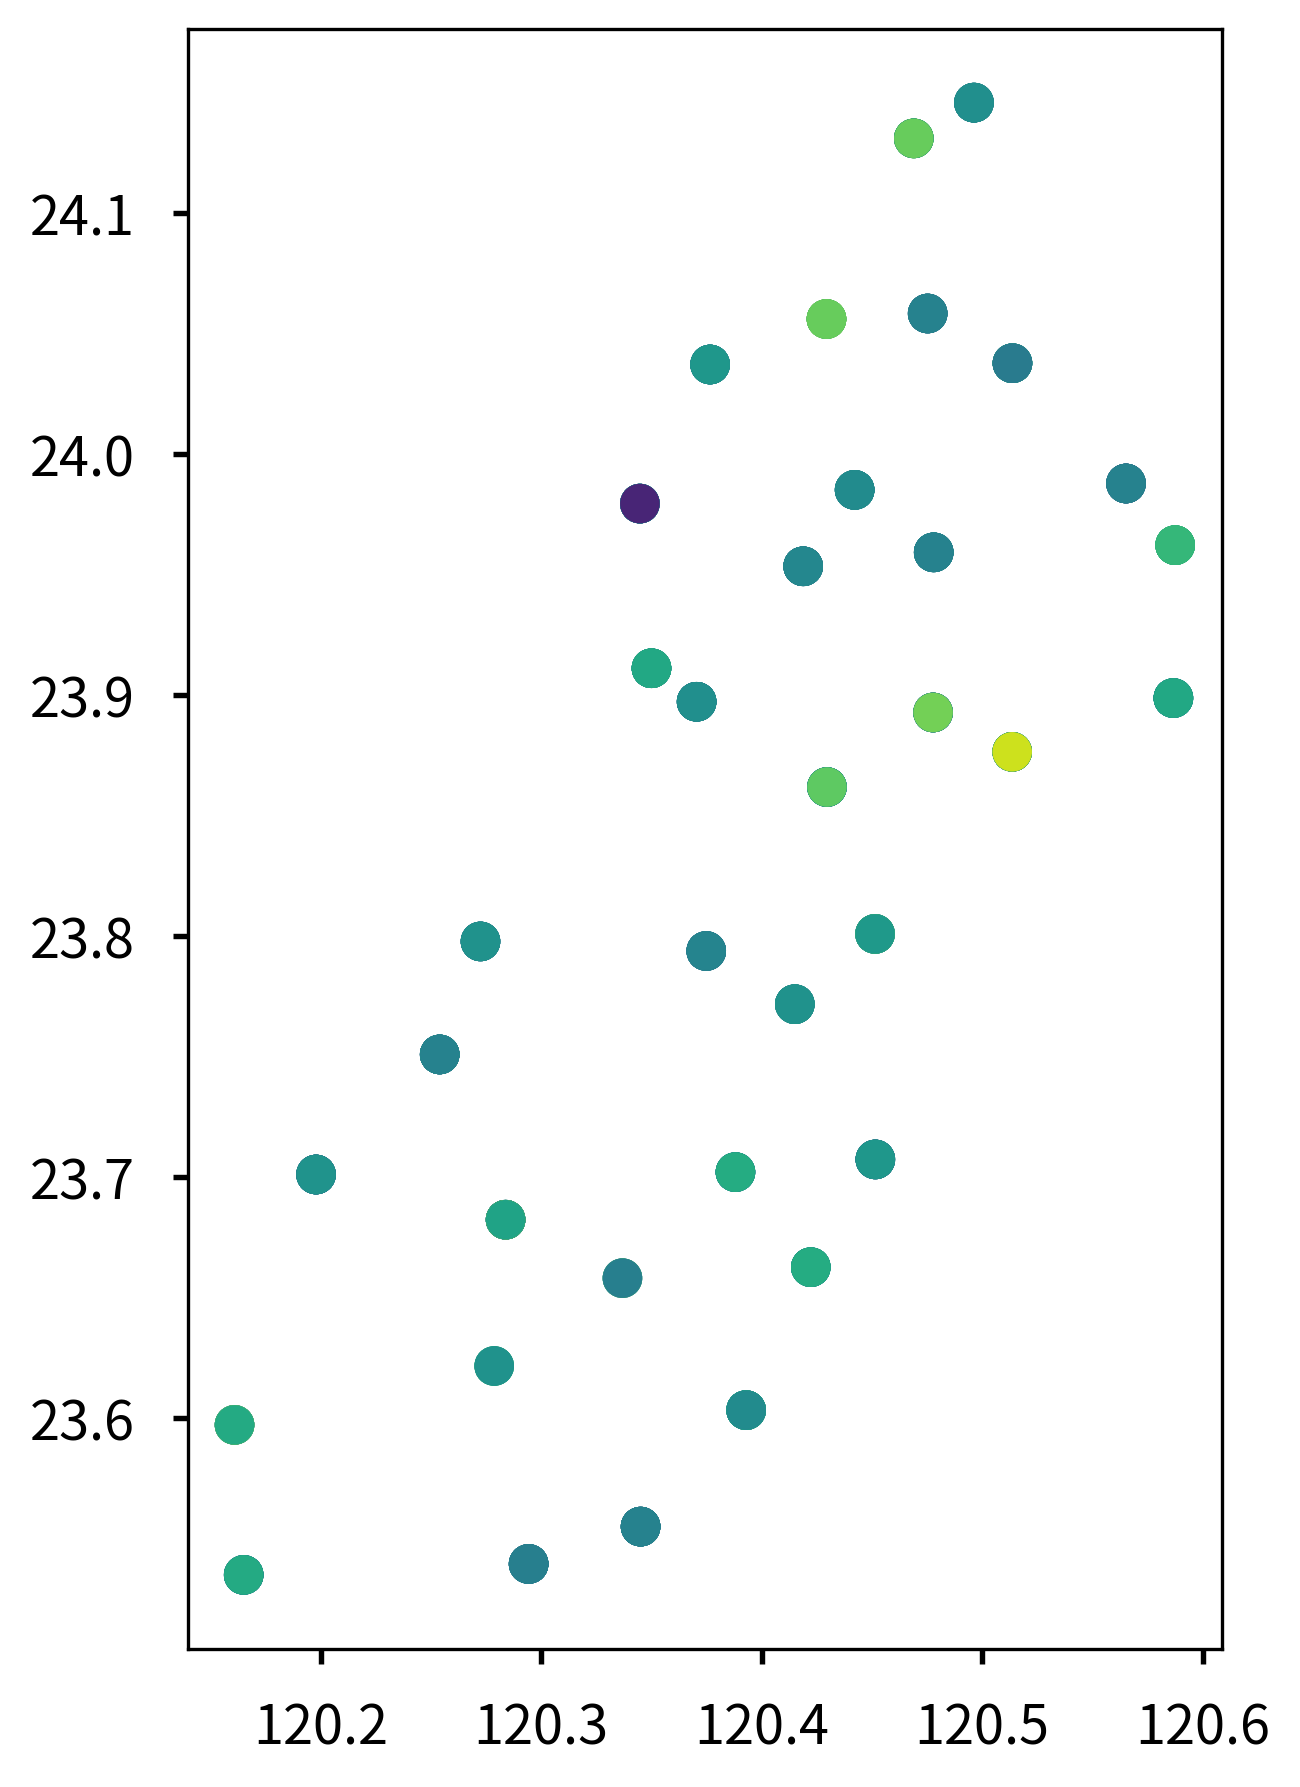

In [39]:
gdf['2000-01-01':'2002-12-31'].plot('Temp')

<AxesSubplot:>

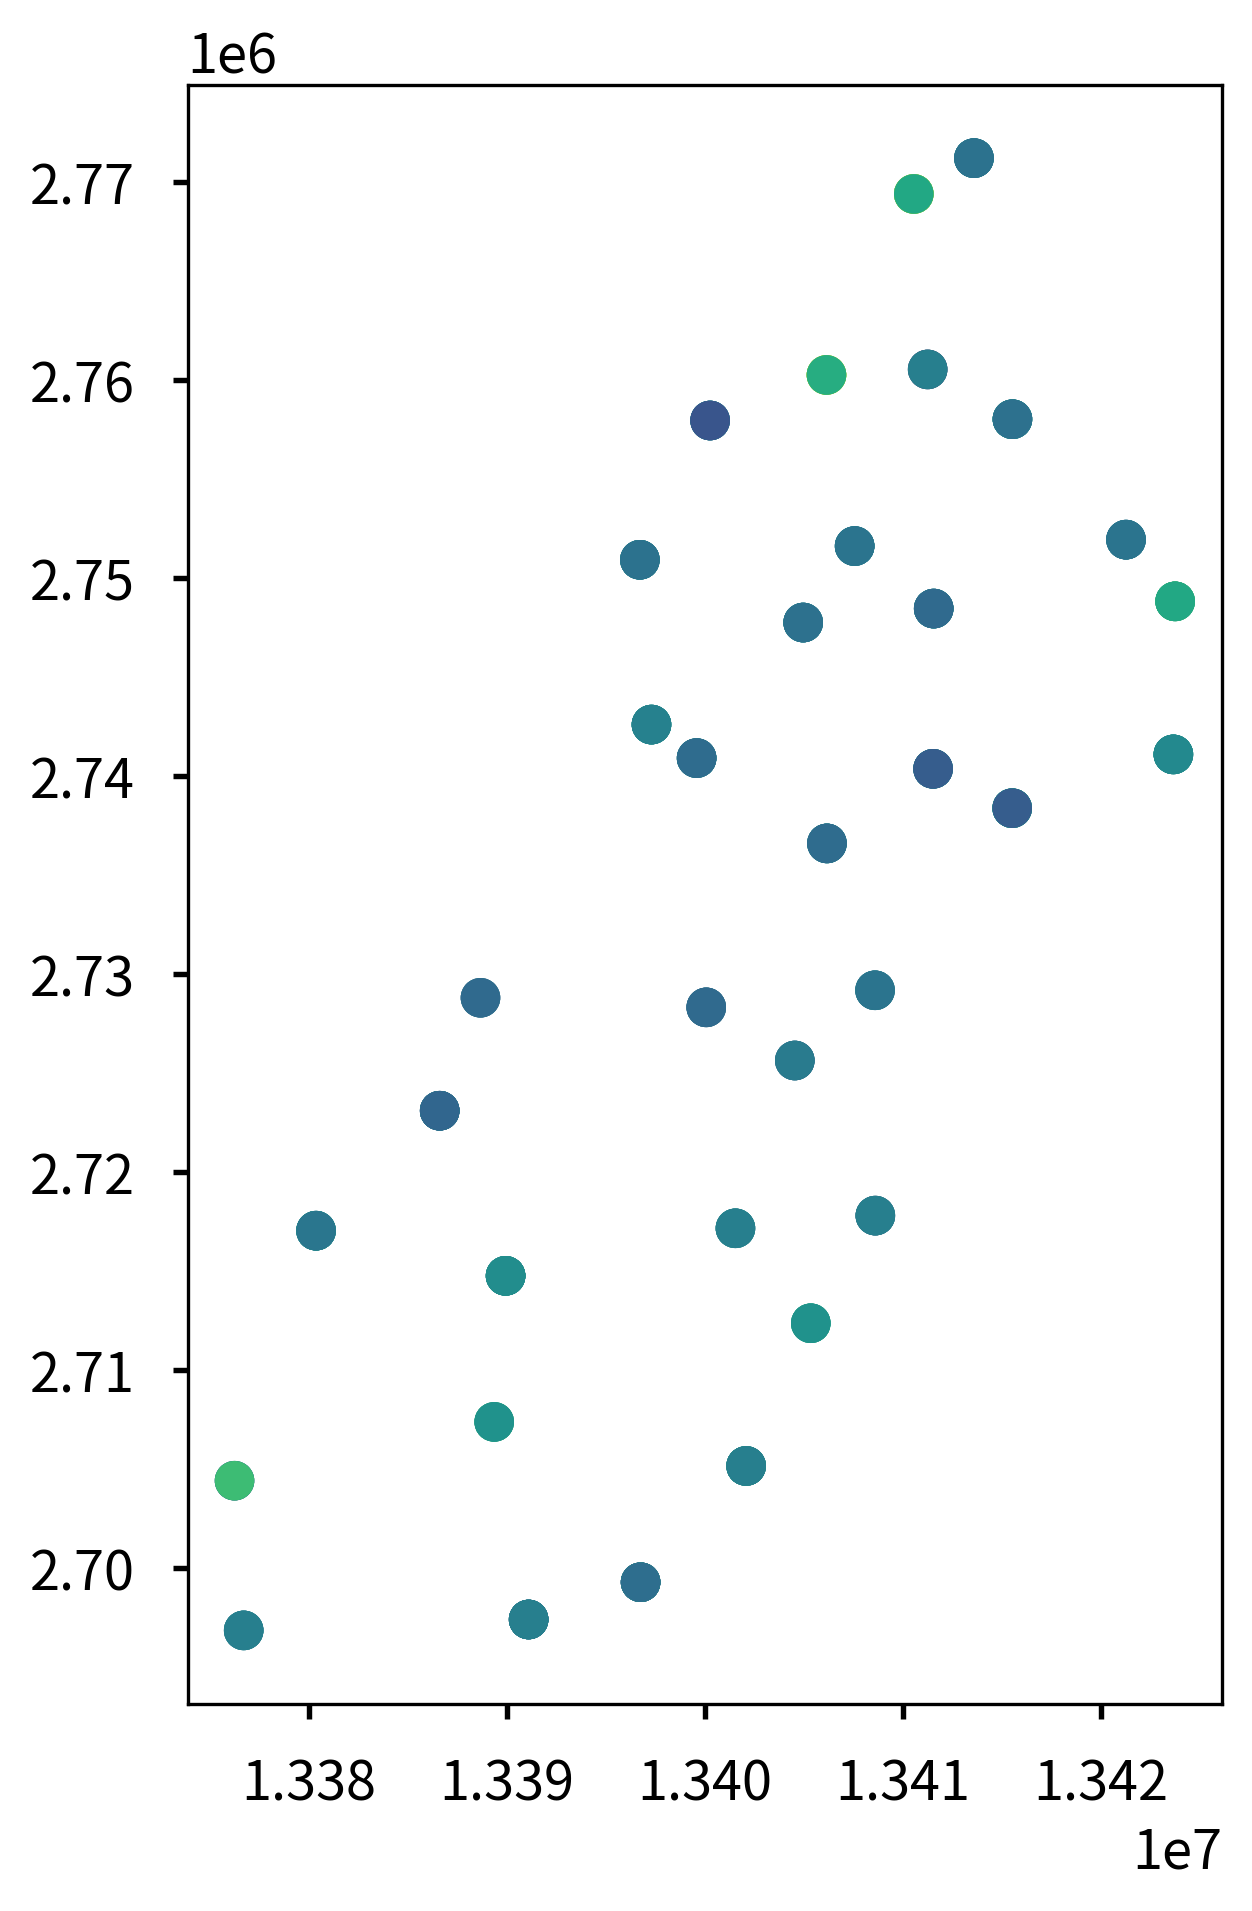

In [40]:
# project to TWD97
gdf_twd = gdf.to_crs('EPSG:900913')
gdf_twd['2000-01-01':'2001-12-31'].plot('Temp')

## Export shape files

In [41]:
# to avoid errors later exporting shape files
gdf = gdf.reset_index()
gdf['Datetime'] = gdf['Datetime'].astype(str)
gdf


,Datetime,SiteName,SiteId,WaterDe_m,Temp,EC,pH,DO,DOS,Hardness,...,PCE,Cl-ethene,DCE,112-TCE,111-TCE,12-DCB,MTBE,Lon,Lat,geometry
0,2000-01-25 00:00:00,六美國小,4401,NaN,23.1,1510.0,6.80,NaN,NaN,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.294385,23.539645,POINT (120.29439 23.53965)
1,2000-01-31 00:00:00,溪口國小(舊),4404,NaN,25.1,1840.0,7.50,NaN,NaN,24.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.393014,23.603459,POINT (120.39301 23.60346)
2,2000-01-31 00:00:00,新港國小(嘉義縣),4402,NaN,21.5,1270.0,7.20,NaN,NaN,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.345162,23.555134,POINT (120.34516 23.55513)
3,2000-02-22 00:00:00,東興國小(彰化縣),4432,NaN,21.0,1210.0,7.30,NaN,NaN,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.475345,24.058339,POINT (120.47535 24.05834)
4,2000-02-25 00:00:00,文昌國小,4416,NaN,26.0,1540.0,6.90,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.451479,23.800981,POINT (120.45148 23.80098)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2020-11-11 10:52:00,大屯國小,4409,3.893,28.6,1020.0,6.84,0.05,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.388168,23.702187,POINT (120.38817 23.70219)
2595,2020-11-11 12:48:00,和平國小(雲林縣105年設),4929,6.995,28.1,2160.0,6.69,0.10,NaN,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.335997,23.658082,POINT (120.33600 23.65808)
2596,2020-11-11 14:45:00,仁和國小,4406,2.337,29.7,823.0,6.55,0.05,NaN,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.422344,23.662755,POINT (120.42234 23.66276)
2597,2020-11-11 16:30:00,平和國小(雲林縣),4411,8.918,28.7,2050.0,6.65,0.25,NaN,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.451610,23.707447,POINT (120.45161 23.70745)


In [43]:
gdf.to_file('data/ZAF_wl+wa_epa_{}.shp'.format(date))